# Scaler

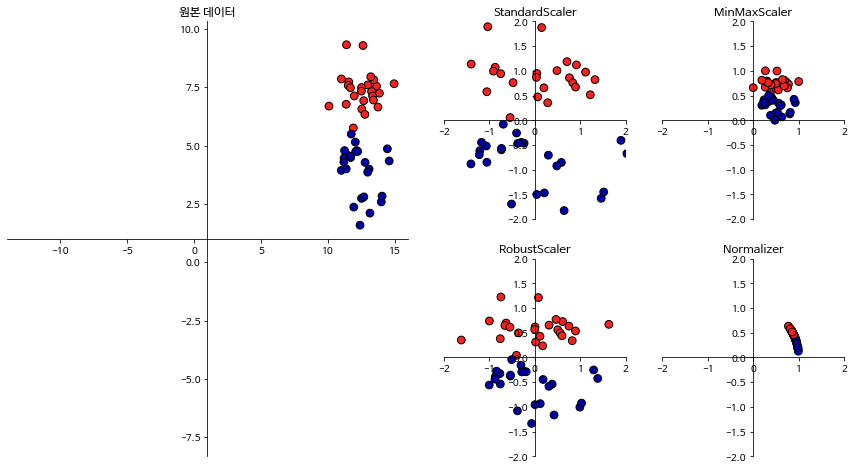

In [1]:
from ml1.preamble import*
mglearn.plots.plot_scaling()

## StandardScaler

* 각 특성의 평균을 0, 분산을 1로 변경
* `(x-x.mean()/x.std())`

## MinMaxScaler

* 모든 값이 정확히 0과 1사이에 있도록 변경 
* `(x-x.min())/(x.max()-x.min())`

## RobustScalser

* StandardScaler와 비슷하지만 median과 quartile을 사용. 아주 동떨어진 데이터 있을때 유용
* `(x-q2)/(q3-q1)`

## Normalizer

* 지름이 1인 원/구에 투영. 길이는 상관없고 방향 또는 각도가 중요할 떄

## 비교

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, PowerTransformer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

# MinMax scaler
scaler1 = MinMaxScaler()
scaler1.fit(X_train)

#Standard scaler
scaler2 = StandardScaler()
scaler2.fit(X_train)

from sklearn.svm import SVC

svc = SVC(C=100).fit(X_train, y_train)
print('<스케일링 전>')
print(f'테스트 세트 정확도 : {svc.score(X_train, y_train):.2f}')
print(f'테스트 세트 정확도 : {svc.score(X_test, y_test):.2f}')


X_train_scaled1, X_test_scaled1 = scaler1.transform(X_train), scaler1.transform(X_test)
svc = SVC(C=100).fit(X_train_scaled1, y_train)
print('<MinMax 스케일 후>')
print(f'테스트 세트 정확도 : {svc.score(X_train_scaled1, y_train):.2f}')
print(f'테스트 세트 정확도 : {svc.score(X_test_scaled1, y_test):.2f}')

X_train_scaled2, X_test_scaled2 = scaler2.transform(X_train), scaler2.transform(X_test)
svc = SVC(C=100).fit(X_train_scaled2, y_train)
print('<Standard 스케일 후>')
print(f'테스트 세트 정확도 : {svc.score(X_train_scaled2, y_train):.2f}')
print(f'테스트 세트 정확도 : {svc.score(X_test_scaled2, y_test):.2f}')

<스케일링 전>
테스트 세트 정확도 : 0.94
테스트 세트 정확도 : 0.94
<MinMax 스케일 후>
테스트 세트 정확도 : 1.00
테스트 세트 정확도 : 0.97
<Standard 스케일 후>
테스트 세트 정확도 : 1.00
테스트 세트 정확도 : 0.97


* 특성 스케일링 시각화

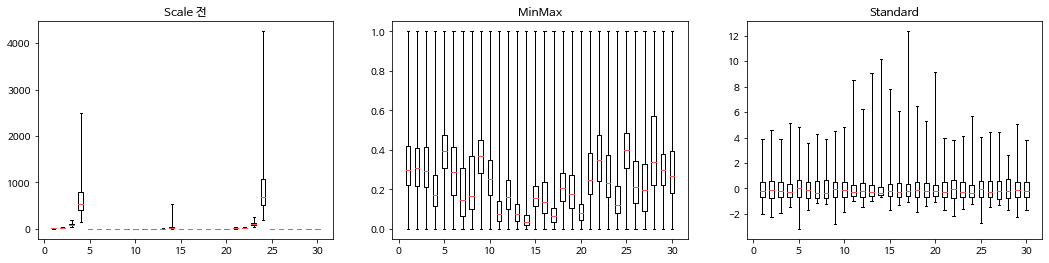

In [3]:
fig, axes = plt.subplots(1,3, figsize=(18,4))
axes[0].boxplot(X_train, manage_ticks=False, whis=[0,100])
axes[0].set_title('Scale 전')
axes[1].boxplot(X_train_scaled1, manage_ticks=False, whis=[0,100])
axes[1].set_title('MinMax')
axes[2].boxplot(X_train_scaled2, manage_ticks=False, whis=[0,100])
axes[2].set_title('Standard')
plt.show()

# Transformer

## QuantileTransformer

* 분위를 사용하여 균등하게 0과 1사이로 압축

In [4]:
x = np.array([0,5,8,7,10])
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x[:,np.newaxis])
x_trans.ravel()

array([0.  , 0.25, 0.75, 0.5 , 1.  ])

* 히스트로그램

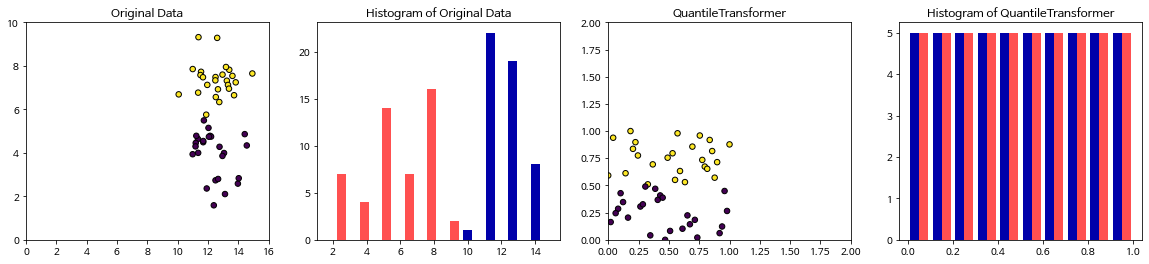

In [5]:

from sklearn.datasets import make_blobs

X, y= make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X +=3

def make_scatter(X, y, xlim, ylim, title, ax=None):
    if ax == None: ax = plt.gca()
    ax.scatter(X[:,0], X[:,1], c= y, s=30, edgecolors='k')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_title(title)

def make_hist(X, title, ax=None):
    if ax == None: ax = plt.gca()
    ax.hist(X)
    ax.set_title(title)
    
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,4))
X_trans= QuantileTransformer(n_quantiles=50).fit_transform(X)
make_scatter(X, y, [0,16], [0,10], 'Original Data', ax=ax1)
make_hist(X, 'Histogram of Original Data', ax2)
make_scatter(X_trans, y, [0,2], [0,2], 'QuantileTransformer', ax=ax3)
make_hist(X_trans, 'Histogram of QuantileTransformer', ax4)
plt.show()

* 정규분포로도 가능

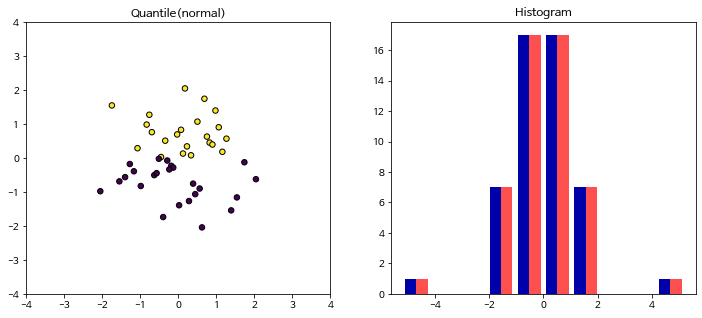

In [6]:
X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
make_scatter(X_trans, y, [-4,4], [-4,4], 'Quantile(normal)', ax=ax1)
make_hist(X_trans, 'Histogram', ax2)

## PowerTransformer

* 데이터의 특성별로 정규분포에 가깝도록 변환
* method는 'box-cox', 'yeo-johnson' 가 있음

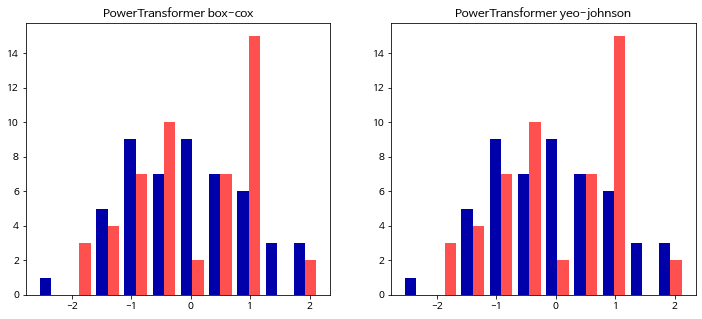

In [7]:

make_scatter(X_trans, y, [-4,4], [-4,4], 'Quantile(normal)', ax=ax1)
make_hist(X_trans, 'Histogram', ax2)

X_trans1 = PowerTransformer(method='box-cox').fit_transform(X)
X_trans2 = PowerTransformer(method='yeo-johnson').fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
make_hist(X_trans1, 'PowerTransformer box-cox', ax1)
make_hist(X_trans2, 'PowerTransformer yeo-johnson', ax2)
plt.show()

# Imputer

## SimpleImpuer

* 누락된 값을 해당 특성의 평균이나 최빈값으로 대체

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [1, np.nan, 6], [2, np.nan, 9]]
print(imp.transform(X))

[[7.  2.  3. ]
 [1.  3.5 6. ]
 [2.  3.5 9. ]]


## KNNImputer

* 누락된 값을 최근접 이웃 방식으로 대체

In [9]:
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 5], [np.nan, 6, 7], [8, 9, 10]]
imp = KNNImputer(n_neighbors=1)
imp.fit_transform(X)

array([[ 1.,  2.,  5.],
       [ 3.,  4.,  5.],
       [ 3.,  6.,  7.],
       [ 8.,  9., 10.]])